In [14]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation


In [15]:
def I(x):
    L = x[-1]
    len_x = np.size(x)
    i_x = np.zeros(len_x)
    for i in range(len_x):
        if x[i] < (L+1)/2 and x[i] > (L-1)/2:
            i_x[i] = 1
    return i_x

def U_exact(x, t):
    L = x[-1]
    u_ex = np.ones(np.size(x)) * (1/L)
    
    for n in range(1, 2000):
        c_n = (2 / (n * np.pi)) * (np.sin((n * np.pi * (L + 1)) / (2 * L)) - np.sin((n * np.pi * (L - 1)) / (2 * L)))
        
        u_ex += c_n * np.cos(n*np.pi*x / L)*np.exp(-1*n** 2 * np.pi**2 * t / L **2)
        
    return u_ex

In [16]:
# end length & end time
L=10; T=4

# diffusion coefficient 
a = 1

# setting up space part
Nx_spaces = 40 * L; Nt_gaps = 50 * T; 
Nx_points = Nx_spaces +  1 ; Nt_points = Nt_gaps + 1

x = np.linspace(0, L, Nx_points)   # mesh points in space
dx = x[1] - x[0]

t = np.linspace(0, T, Nt_points) # mesh points in time
dt = t[1] - t[0]

C = a * dt/dx**2
print("dx=",dx,"dt=", dt,"C =",C)

# set up matrices
u   = np.zeros(Nx_points)
u_old = np.zeros(Nx_points)

U = np.zeros((Nx_points,Nt_points))
U_ex = np.zeros((Nx_points, Nt_points))

# Data structures for the linear system
A = np.zeros((Nx_points, Nx_points))
b = np.zeros(Nx_points)

# set up the matrix A
for i in range(1, Nx_points-1): # rows from 1 to Nx-2
    A[i,i-1] = -C
    A[i,i+1] = -C
    A[i,i] = 1 + 2*C
A[0,0] = 1+2*C  ; A[0,1]= -2*C 
A[Nx_points-1,Nx_points-1] = 1+2*C 
A[Nx_points-1,Nx_points-2] = -2*C

# find the inverse of A and use for all points
Ainv = np.linalg.inv(A)

# Set initial condition u(x,0) = I(x)
u_old = I(x) # no dirichlet boundary conditions in this example

# initialise matrices U and U_ex2 for first time step
U[:,0] = u_old[:]
U_ex[:,0] = U_exact(x,0)

#perform time=stepping
for n in range(1, Nt_points): # timestep for 1 to t = T-1 so last step finishes on t=T
    # Compute b and solve linear system
    b[:] = u_old[:]
    u[:] = np.dot(Ainv,b)
    # Update u_1 before next step
    u_old = u
    U[:,n] = u
    U_ex[:,n]=U_exact(x,t[n])

dx= 0.025 dt= 0.02 C = 31.999999999999993


In [17]:
# # set up animation plots
# fig, ax = plt.subplots()
# ax.axis([-1,6,0,1])
# def animate(i):
#     l.set_data(x, U[:,i])
#     m.set_data(x,U_ex[:,i])
    
# ax.axis([-1,6,0,1])
# l, = ax.plot([],[],':r')
# m, = ax.plot([],[],'-.b')

# ani2 = matplotlib.animation.FuncAnimation(fig, animate, frames=Nt_points)

# from IPython.display import HTML
# HTML(ani2.to_jshtml())

Text(0.5, 0.98, 'Diffusion of Gas')

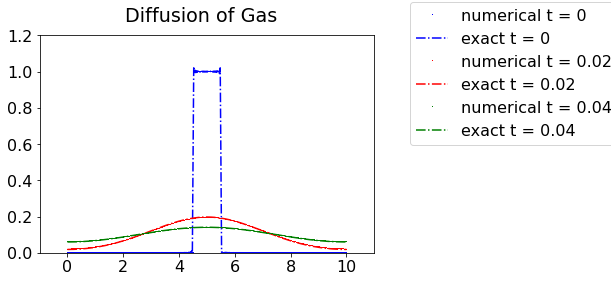

In [27]:
times = np.linspace(0, Nt_gaps, 3, dtype = int)

fig, ax = plt.subplots(1, 1, sharex=True, sharey=True)

plt.rcParams['font.size'] = '16'
ax.axis([-1, 11, 0, 1.2])

ax.plot(x, U[:, times[0]], 'b,', label = f'numerical t = {times[0]}')
ax.plot(x, U_ex[:, times[0]], 'b-.', label = f'exact t = {times[0]}')

ax.plot(x, U[:, times[1]], 'r,', label = f'numerical t = {t[1]}')
ax.plot(x, U_ex[:, times[1]], 'r-.', label = f'exact t = {t[1]}')

ax.plot(x, U[:, times[2]], 'g,', label = f'numerical t = {t[2]}')
ax.plot(x, U_ex[:, times[2]], 'g-.', label = f'exact t = {t[2]}')

fig.legend(bbox_to_anchor = (1.45, 1))
fig.suptitle('Diffusion of Gas')
# plt.tight_layout()

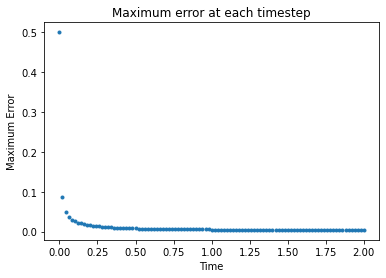

In [ ]:
# graph error
def find_max_error(u, exact):
    error = abs(u - exact)

    return np.amax(error, axis = 0)

plt.scatter(t, find_max_error(U, U_ex), marker = ".")

plt.xlabel('Time')
plt.ylabel('Maximum Error')
plt.title('Maximum error at each timestep')
plt.show()


In [ ]:
area = []

for i in range(0, len(t)):
    area.append(scipy.integrate.simps(U[:, i], x))

plt.scatter(t, area, marker = ".")

plt.xlabel('Time')
plt.ylabel('Area under the curve')
plt.title('The Area Under the curve at each timestep')
plt.show()

NameError: name 'scipy' is not defined